# TensorFlow/Keras Neural Network - MNIST Classification

This notebook demonstrates building a neural network with TensorFlow/Keras in just a few lines of code!

## 1. Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


## 2. Load and Preprocess MNIST Dataset

In [7]:
def load_and_preprocess_mnist():
    """Load and preprocess MNIST dataset with error handling."""
    print("Loading MNIST dataset...")
    
    try:
        # Try to load MNIST from OpenML
        mnist = fetch_openml('mnist_784', version=1, parser='auto')
        X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)
        
        # Use subset for faster training
        X, _, y, _ = train_test_split(X, y, train_size=10000, random_state=42, stratify=y)
        
        # Split into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    except Exception as e:
        print(f"Error loading from OpenML: {e}")
        print("Loading from Keras instead...")
        
        # Alternative: Load from Keras
        (X_train_full, y_train_full), (X_test_full, y_test_full) = keras.datasets.mnist.load_data()
        
        # Flatten and use subset
        X_train = X_train_full[:8000].reshape(8000, -1)
        X_test = X_test_full[:2000].reshape(2000, -1)
        y_train = y_train_full[:8000]
        y_test = y_test_full[:2000]
    
    print(f"Train samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
    
    # Normalize pixel values to [0, 1]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    
    print(f"✓ Data loaded and preprocessed successfully!")
    return X_train, X_test, y_train, y_test

## 3. Create Neural Network Model

Architecture: 784 → 128 → 64 → 10

**Look how simple this is compared to NumPy implementation!**

In [8]:
def create_tensorflow_model():
    """
    Create a neural network using TensorFlow/Keras.
    Same architecture as NumPy version: 784 -> 128 -> 64 -> 10
    """
    model = keras.Sequential([
        keras.layers.Input(shape=(784,)),  # Input layer
        keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
        keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
        keras.layers.Dense(10, activation='softmax') # Output layer
    ])
    
    # Compile model with same settings as NumPy version
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.1),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

## 4. Train the Model

In [9]:
# Load data
X_train, X_test, y_train, y_test = load_and_preprocess_mnist()

# Create model
print("\nCreating TensorFlow model...")
model = create_tensorflow_model()
print("\nModel Architecture:")
model.summary()

# Train model
print("\n" + "="*60)
print("Training TensorFlow model...")
print("="*60)

start_time = time.time()

# Simple training with progress bar
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Reduced for faster notebook execution
    batch_size=32,
    verbose=1  # Show progress
)

tf_training_time = time.time() - start_time

print("="*60)
print(f"✓ Training completed in {tf_training_time:.2f} seconds!")
print("="*60)

Loading MNIST dataset...
Train samples: 8000
Test samples: 2000
✓ Data loaded and preprocessed successfully!

Creating TensorFlow model...

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training TensorFlow model...
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8050 - loss: 0.6537 - val_accuracy: 0.8785 - val_loss: 0.3906
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9078 - loss: 0.3047 - val_accuracy: 0.9125 - val_loss: 0.2711
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9355 - loss: 0.2187 - val_accuracy: 0.9220 - val_loss: 0.2418
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9485 - loss: 0.1672 - val_accuracy: 0.9220 - val_loss: 0.2397
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9600 - loss: 0.1317 - val_accuracy: 0.9370 - val_loss: 0.2148
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9715 - loss: 0.1017 - val_accuracy: 0.9450 - val_loss: 0.1892
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9772 - loss: 0.0796 - val_accuracy: 0.9390 - val_loss: 0.1935
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accura

## 5. Evaluate the Model

In [10]:
# Evaluate on test set
print("\nEvaluating TensorFlow model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Training Time: {tf_training_time:.2f} seconds")
print("="*60)


Evaluating TensorFlow model...

FINAL RESULTS
Test Loss:     0.2285
Test Accuracy: 0.9515 (95.15%)
Training Time: 12.55 seconds


## 6. Plot Training History

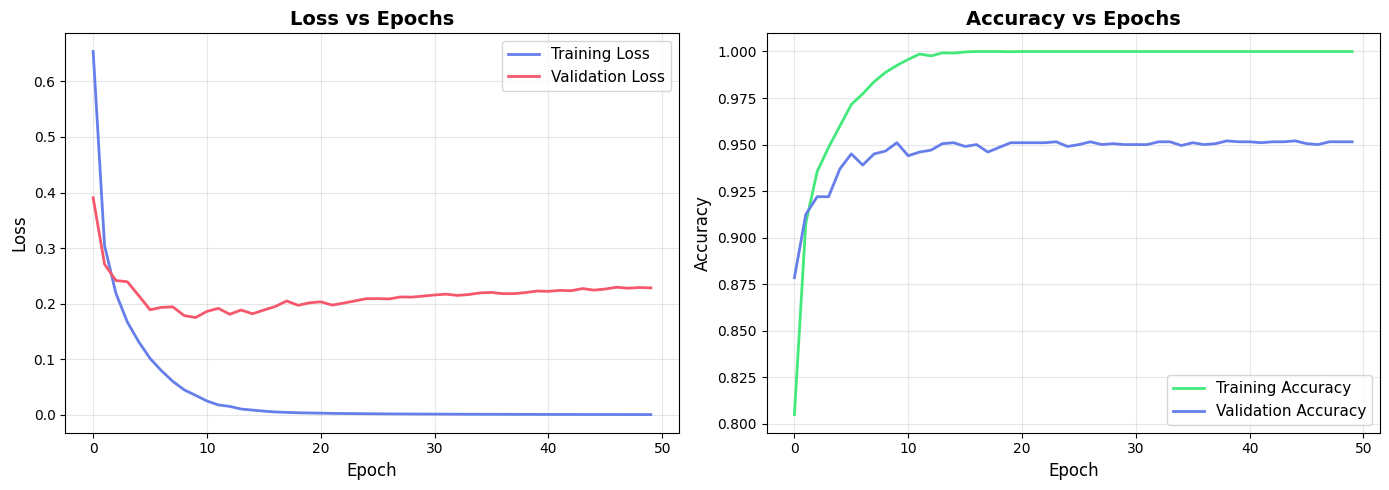


✓ Visualizations complete!


In [11]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='#667eea')
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#f5576c')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Loss vs Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Accuracy curve
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='#43e97b')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#667eea')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Accuracy vs Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations complete!")

## 7. Make Predictions on Test Samples

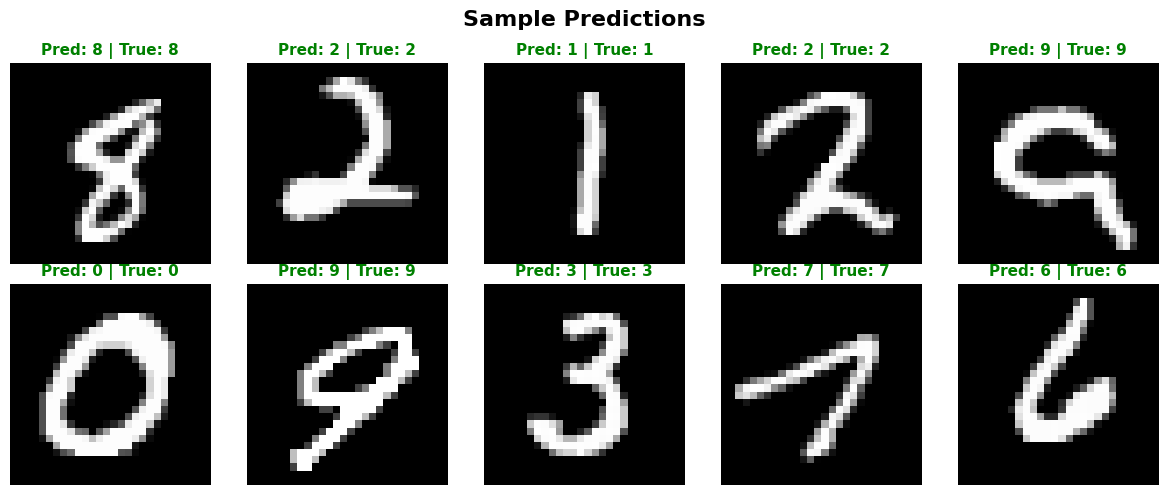


Accuracy on these 10 samples: 100.0%


In [12]:
# Make predictions
predictions = model.predict(X_test[:10], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:10]

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample Predictions', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Reshape to 28x28 image
    image = X_test[i].reshape(28, 28)
    pred = predicted_classes[i]
    true = true_classes[i]
    
    ax.imshow(image, cmap='gray')
    color = 'green' if pred == true else 'red'
    ax.set_title(f'Pred: {pred} | True: {true}', 
                fontsize=11, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\nAccuracy on these 10 samples: {np.mean(predicted_classes == true_classes)*100:.1f}%")

## 8. Summary: TensorFlow vs NumPy

### Key Differences:

| Aspect | NumPy (From Scratch) | TensorFlow/Keras |
|--------|---------------------|------------------|
| **Lines of Code** | ~300 lines | ~15 lines |
| **Forward Pass** | Manual implementation | Automatic |
| **Backpropagation** | Manual gradients | Automatic |
| **Optimization** | Manual updates | Built-in |
| **GPU Support** | No | Yes |
| **Complexity** | High | Low |
| **Learning Value** | Understand internals | Build quickly |

### Conclusion:

✅ **NumPy**: Great for learning how neural networks work internally  
✅ **TensorFlow**: Great for building real-world applications  

**Both are valuable!** 🎓